In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\Lenovo\\Documents\\Python Practice\\ML\\Decision Tree and Random Forest\\kyphosis.csv")

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


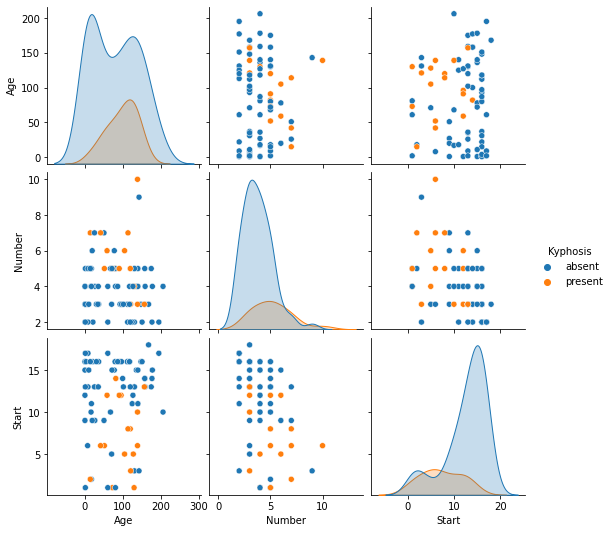

In [7]:
sns.pairplot(df,hue='Kyphosis')

In [8]:
from sklearn.model_selection import  train_test_split

In [9]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree=DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
pred= dtree.predict(X_test)

In [15]:
pred

array(['present', 'present', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

      absent       0.81      0.85      0.83        20
     present       0.25      0.20      0.22         5

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.70      0.72      0.71        25

[[17  3]
 [ 4  1]]


In [18]:
from sklearn import tree

In [19]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 8.50
|   |--- feature_0 <= 93.00
|   |   |--- feature_1 <= 4.50
|   |   |   |--- class: absent
|   |   |--- feature_1 >  4.50
|   |   |   |--- feature_0 <= 22.00
|   |   |   |   |--- class: absent
|   |   |   |--- feature_0 >  22.00
|   |   |   |   |--- class: present
|   |--- feature_0 >  93.00
|   |   |--- feature_0 <= 141.00
|   |   |   |--- class: present
|   |   |--- feature_0 >  141.00
|   |   |   |--- class: absent
|--- feature_2 >  8.50
|   |--- feature_1 <= 4.50
|   |   |--- class: absent
|   |--- feature_1 >  4.50
|   |   |--- feature_0 <= 39.50
|   |   |   |--- class: absent
|   |   |--- feature_0 >  39.50
|   |   |   |--- feature_1 <= 5.50
|   |   |   |   |--- feature_0 <= 81.00
|   |   |   |   |   |--- class: absent
|   |   |   |   |--- feature_0 >  81.00
|   |   |   |   |   |--- feature_0 <= 110.50
|   |   |   |   |   |   |--- class: present
|   |   |   |   |   |--- feature_0 >  110.50
|   |   |   |   |   |   |--- class: absent
|   |   |   |--- feature_1

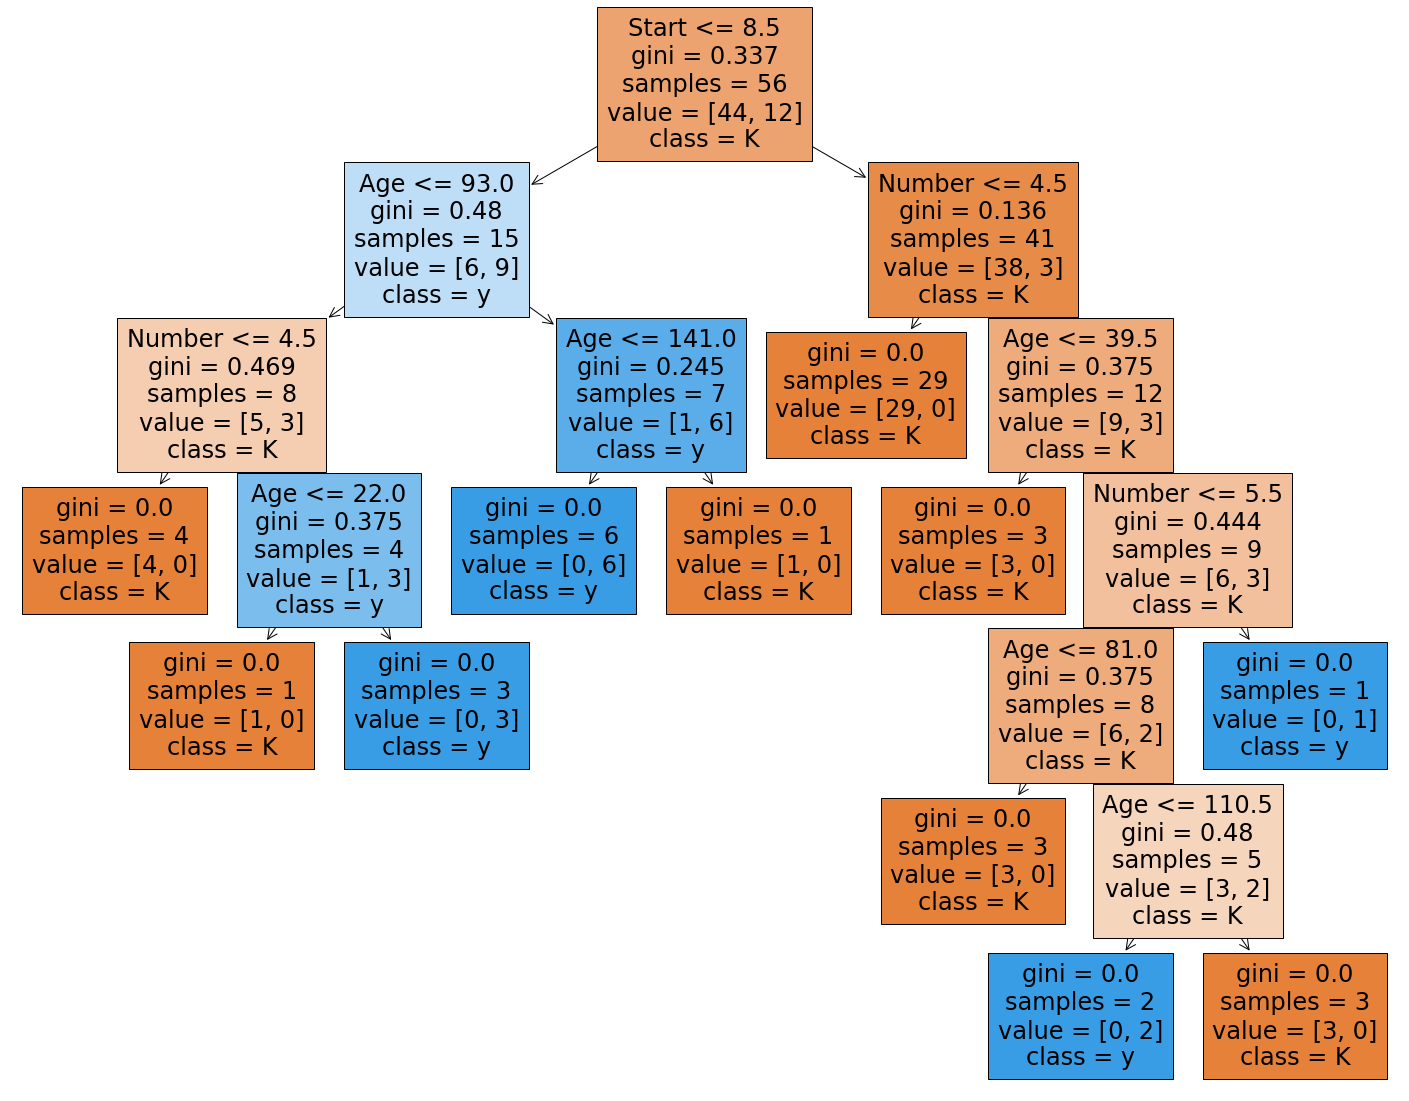

In [20]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=['Age','Number','Start'],  
                   class_names='Kyphosis',
                   filled=True)

In [21]:
# import graphviz
# # DOT data
# dot_data = tree.export_graphviz(dtree, out_file=None, 
#                                 feature_names=['Age','Number','Start'],  
#                                 class_names='Kyphosis',
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph 

## HyperParameters

In [22]:
from sklearn.model_selection import GridSearchCV

parameters= { "criterion" : ["gini", "entropy", "log_loss"] , "max_depth" : [1,2,3,4,5,6,7,8,9,10]  }

grid= GridSearchCV(dtree,param_grid=parameters,cv=10,n_jobs=-1)

In [23]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [24]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [25]:
grid.best_score_

0.8099999999999999

In [26]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc=RandomForestClassifier(n_estimators=150)

In [39]:
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=150)

In [40]:
predict= rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test,predict))

print(classification_report(y_test,predict))



[[18  2]
 [ 5  0]]
              precision    recall  f1-score   support

      absent       0.78      0.90      0.84        20
     present       0.00      0.00      0.00         5

    accuracy                           0.72        25
   macro avg       0.39      0.45      0.42        25
weighted avg       0.63      0.72      0.67        25



In [42]:
from sklearn.model_selection import GridSearchCV

parameters= { "criterion" : ["gini", "entropy", "log_loss"] , "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13]  ,
             "max_features" : ["sqrt", "log2", None]}

grid= GridSearchCV(dtree,param_grid=parameters,cv=10,n_jobs=-1)


In [43]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'max_features': ['sqrt', 'log2', None]})

In [44]:
grid.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=8, max_features='sqrt')

In [45]:
grid.best_params_

{'criterion': 'log_loss', 'max_depth': 8, 'max_features': 'sqrt'}

In [46]:
grid.best_score_

0.8900000000000002